- Marcellino Mahesa Janitra - 5025201105

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn import preprocessing
import pandas as pd
import numpy as np

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
data  = pd.read_csv("titanic_train.csv")

data = data.drop(["PassengerId", "Name", "Ticket", "Cabin"],axis=1)
data.dropna(inplace=True)

le = preprocessing.LabelEncoder()

#change sex and embarked to numbers 
cols = ["Sex","Embarked"]

for col in cols:
    data[col] = le.fit_transform(data[col])

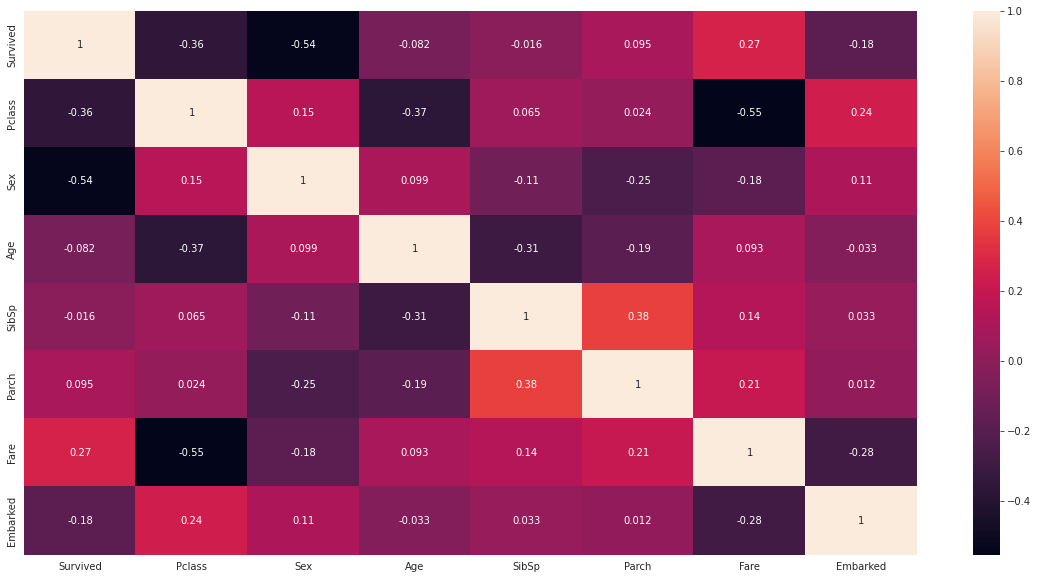

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

# Mengecek korelasi antar feature dengan target
plt.figure(figsize=(20,10)) 
sns.heatmap(data.corr(), annot=True) 

In [ ]:
y = data["Survived"]
X = data.drop(["Survived"],axis=1)

In [ ]:
# Manualy drop feature yang treshold nya lebih dari 50% dan cari yang korelasi ke survived nya paling besar
X.drop(["Fare"], axis=1, inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    print(f"Test Result: (Train: {train})\n================================================")    
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))    
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")
    print("")

In [ ]:
# Linear SVM
from sklearn.svm import LinearSVC
model_linear = LinearSVC()
model_linear.fit(X_train, y_train, )

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC()

In [ ]:
print_score(model_linear, X_train, y_train, X_test, y_test, train=True)
print_score(model_linear, X_train, y_train, X_test, y_test, train=False)

Test Result: (Train: True)
Accuracy Score: 78.91%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.815857    0.746988  0.789062    0.781422      0.788094
recall       0.835079    0.720930  0.789062    0.778004      0.789062
f1-score     0.825356    0.733728  0.789062    0.779542      0.788418
support    382.000000  258.000000  0.789062  640.000000    640.000000
_______________________________________________
Confusion Matrix: 
 [[319  63]
 [ 72 186]]


Test Result: (Train: False)
Accuracy Score: 80.56%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.804348   0.807692  0.805556   0.806020      0.805741
recall      0.880952   0.700000  0.805556   0.790476      0.805556
f1-score    0.840909   0.750000  0.805556   0.795455      0.803030
support    42.000000  30.000000  0.805556  72.

In [ ]:
# Polynomial SVM
from sklearn.svm import SVC
model_polynomial = SVC()
model_polynomial.fit(X_train, y_train)

SVC()

In [ ]:
print_score(model_polynomial, X_train, y_train, X_test, y_test, train=True)
print_score(model_polynomial, X_train, y_train, X_test, y_test, train=False)

Test Result: (Train: True)
Accuracy Score: 62.81%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.620000    0.750000  0.628125    0.685000      0.672406
recall       0.973822    0.116279  0.628125    0.545051      0.628125
f1-score     0.757637    0.201342  0.628125    0.479490      0.533381
support    382.000000  258.000000  0.628125  640.000000    640.000000
_______________________________________________
Confusion Matrix: 
 [[372  10]
 [228  30]]


Test Result: (Train: False)
Accuracy Score: 61.11%
_______________________________________________
CLASSIFICATION REPORT:
                   0     1  accuracy  macro avg  weighted avg
precision   0.612903   0.6  0.611111   0.606452      0.607527
recall      0.904762   0.2  0.611111   0.552381      0.611111
f1-score    0.730769   0.3  0.611111   0.515385      0.551282
support    42.000000  30.0  0.611111  72.000000     72.000000
____

 # penjelasan Hasil
 ## Train:
 prediction dihitung dari X jenis apa, kalau train false predict pakai X_test, kalau true predict pakai X_train

 ## precission
 true positive / (true positive + false positive)

 ## recall
 true positive / (true positive + false negative)

 ## f1-score
 precission * recall / (precission + recall)

 ## support
 berapa target muncul di dataset (in this case kita aliaskan 0 dan 1)

 ## macro average
 menghitung langsung rata-rata (total data/jumlah data

 ## weighted average
 menghitung rata-rata dan memperhatikan proporsi data

 ## Confusion Matrix 
 [True Positive, False Positive]

 [False Negative, True Negative]


In [ ]:
test  = pd.read_csv("titanic_test.csv")
test = test.drop(["PassengerId", "Name", "Ticket", "Cabin", "Fare"],axis=1)
test.dropna(inplace=True)

le = preprocessing.LabelEncoder()

#change sex and embarked to numbers 
cols = ["Sex","Embarked"]

for col in cols:
    test[col] = le.fit_transform(test[col])
print("Survived Linear SVM:")
print(model_linear.predict(test))
print("Survived Polynomial SVM:")
print(model_polynomial.predict(test))

NameError: name 'pd' is not defined